In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
import ast 
import torch

In [2]:
def test_val_extractor(file_name):    
    # get accuracy from sparsity.txt
    test_val_accumulator = list()
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 0:
                line = ast.literal_eval(line)
                test_val_accumulator = line
                
    # return list of test accuracy 
    return test_val_accumulator

In [3]:
def selectivity_val_extractor(file_name):
    selectivity_average = 0
    selectivity_std = 0
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 2:
                selectivity_average = ast.literal_eval(line)
            if i == 3:
                selectivity_std = ast.literal_eval(line)
    return selectivity_average, selectivity_std

In [4]:
def sparsity_val_extractor(file_name):
    sparsity_average = 0
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 1:
                sparsity_average = ast.literal_eval(line)
    return sparsity_average

In [5]:
def all_plotter_test(test_adadelta, test_adagrad, test_sgd, test_adam, location='best'):
    fig, ax = plt.subplots(figsize=(10, 8))
    
    ax.plot(np.linspace(0.0, 30, num=30), test_adadelta, label='test_adadelta', c='blue')
    ax.plot(np.linspace(0.0, 30, num=30), test_adagrad, label='test_adagrad', c='green')
    ax.plot(np.linspace(0.0, 30, num=30), test_sgd, label='test_sgd', c='red')
    ax.plot(np.linspace(0.0, 30, num=30), test_adam, label='test_adam', c='violet')
    
    ax.set_ylim([-0.2,1.2])
    ax.legend(loc=location)
    plt.show()

In [6]:
def all_plotter_spar_selec(spar_adadelta, selec_adadelta, spar_adagrad, selec_adagrad, spar_sgd, selec_sgd, spar_adam, selec_adam, location='best'):
    fig, ax = plt.subplots(figsize=(10, 8))
    
    ax.plot(np.linspace(0.0, 30, num=30), spar_adadelta, label='spar_adadelta', c='blue')
    ax.plot(np.linspace(0.0, 30, num=30), selec_adadelta, label='selec_adadelta', c='darkblue')
    
    ax.plot(np.linspace(0.0, 30, num=30), spar_adagrad, label='spar_adagrad', c='green')
    ax.plot(np.linspace(0.0, 30, num=30), selec_adagrad, label='selec_adagrad', c='darkgreen')
    
    ax.plot(np.linspace(0.0, 30, num=30), spar_sgd, label='spar_sgd', c='red')
    ax.plot(np.linspace(0.0, 30, num=30), selec_sgd, label='selec_sgd', c='darkred')
    
    ax.plot(np.linspace(0.0, 30, num=30), spar_adam, label='spar_adam', c='violet')
    ax.plot(np.linspace(0.0, 30, num=30), selec_adam, label='selec_adam', c='darkviolet')
    
    ax.set_ylim([-0.2,1.2])
    ax.legend(loc=location)
    plt.show()

In [7]:
def subplots(test_acc_sgd, test_acc_adadelta, test_acc_adagrad, test_acc_adam, 
             sparsity_sgd, sparsity_adadelta, sparsity_adagrad, sparsity_adam, 
             selectivity_avg_sgd, selectivity_avg_adadelta, selectivity_avg_adagrad, selectivity_avg_adam):
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21,7))
    
    # ax1 = testing 
    ax1.plot(np.linspace(0, 30, 30), test_acc_sgd, label='SGD test accuracy', c='red')
    ax1.plot(np.linspace(0, 30, 30), test_acc_adadelta, label='Adadelta test accuracy', c='blue')
    ax1.plot(np.linspace(0, 30, 30), test_acc_adagrad, label='Adagrad test accuracy', c='green')
    ax1.plot(np.linspace(0, 30, 30), test_acc_adam, label='Adam test accuracy', c='violet')
    ax1.set_ylim([0.85,1.0])
    ax1.grid()
    ax1.legend(loc='best')
    
    # ax2 = sparsity 
    ax2.plot(np.linspace(0, 30, 30), sparsity_sgd, label='SGD sparsity', c='red')
    ax2.plot(np.linspace(0, 30, 30), sparsity_adadelta, label='Adadelta sparsity', c='blue')
    ax2.plot(np.linspace(0, 30, 30), sparsity_adagrad, label='Adagrad sparsity', c='green')
    ax2.plot(np.linspace(0, 30, 30), sparsity_adam, label='Adam sparsity', c='violet')
    ax2.set_ylim([0,0.8])
    ax2.grid()
    ax2.legend(loc='best')
    
    # ax3 = selectivity
    ax3.plot(np.linspace(0, 30, 30), selectivity_avg_sgd, label='SGD selectivity', c='red')
    ax3.plot(np.linspace(0, 30, 30), selectivity_avg_adadelta, label='Adadelta selectivity', c='blue')
    ax3.plot(np.linspace(0, 30, 30), selectivity_avg_adagrad, label='Adagrad selectivity', c='green')
    ax3.plot(np.linspace(0, 30, 30), selectivity_avg_adam, label='Adam selectivity', c='violet')
    ax3.set_ylim([0,0.8])
    ax3.grid()
    ax3.legend(loc='best')
    
    plt.show()

# Test accuracy / Sparsity / Selectivity on last epoch(30)

In [8]:
test_acc_adadelta = test_val_extractor("sparsity_selectivity_4_optim_Adadelta.txt")
test_acc_adagrad = test_val_extractor("sparsity_selectivity_4_optim_Adagrad.txt")
test_acc_sgd = test_val_extractor("sparsity_selectivity_4_optim_SGD.txt")
test_acc_adam = test_val_extractor("sparsity_selectivity_4_optim_Adam.txt")

sparsity_adadelta = sparsity_val_extractor("sparsity_selectivity_4_optim_Adadelta.txt")
sparsity_adagrad = sparsity_val_extractor("sparsity_selectivity_4_optim_Adagrad.txt")
sparsity_sgd = sparsity_val_extractor("sparsity_selectivity_4_optim_SGD.txt")
sparsity_adam = sparsity_val_extractor("sparsity_selectivity_4_optim_Adam.txt")

selectivity_avg_adadelta, selectivity_std_adadelta = selectivity_val_extractor("sparsity_selectivity_4_optim_Adadelta.txt")
selectivity_avg_adagrad, selectivity_std_adagrad = selectivity_val_extractor("sparsity_selectivity_4_optim_Adagrad.txt")
selectivity_avg_sgd, selectivity_std_sgd = selectivity_val_extractor("sparsity_selectivity_4_optim_SGD.txt")
selectivity_avg_adam, selectivity_std_adam = selectivity_val_extractor("sparsity_selectivity_4_optim_Adam.txt")

print("Test accuracy / Sparsity / Selectivity on last epoch(30)\n")
print(f"SGD: Test acc={test_acc_sgd[-1]:.3f}, Spar={sparsity_sgd[-1]:.3f}, Selec avg={selectivity_avg_sgd[-1]:.3f}, Selec std={selectivity_std_sgd[-1]:.3f}")
print()
print(f"Adadelta: Test acc={test_acc_adadelta[-1]:.3f}, Spar={sparsity_adadelta[-1]:.3f}, Selec avg={selectivity_avg_adadelta[-1]:.3f}, Selec std={selectivity_std_adadelta[-1]:.3f}")
print()
print(f"Adagrad: Test acc={test_acc_adagrad[-1]:.3f}, Spar={sparsity_adagrad[-1]:.3f}, Selec avg={selectivity_avg_adagrad[-1]:.3f}, Selec std={selectivity_std_adagrad[-1]:.3f}")
print()
print(f"Adam: Test acc={test_acc_adam[-1]:.3f}, Spar={sparsity_adam[-1]:.3f}, Selec avg={selectivity_avg_adam[-1]:.3f}, Selec std={selectivity_std_adam[-1]:.3f}")

Test accuracy / Sparsity / Selectivity on last epoch(30)

SGD: Test acc=0.971, Spar=0.222, Selec avg=0.320, Selec std=0.174

Adadelta: Test acc=0.982, Spar=0.327, Selec avg=0.406, Selec std=0.173

Adagrad: Test acc=0.980, Spar=0.602, Selec avg=0.646, Selec std=0.201

Adam: Test acc=0.981, Spar=0.289, Selec avg=0.371, Selec std=0.174


# Test accuracy

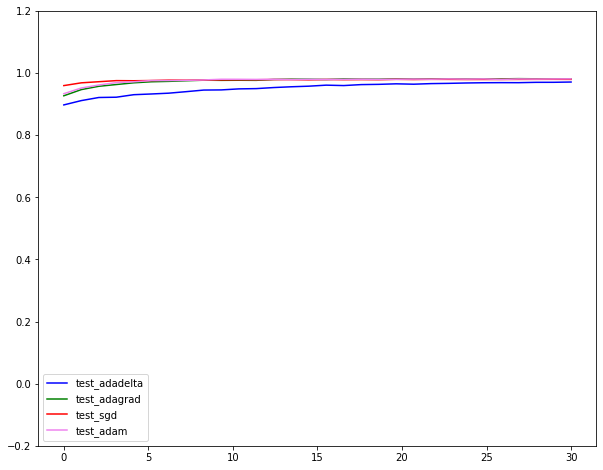

In [9]:
test_acc_adadelta = test_val_extractor("sparsity_selectivity_4_optim_Adadelta.txt")
test_acc_adagrad = test_val_extractor("sparsity_selectivity_4_optim_Adagrad.txt")
test_acc_sgd = test_val_extractor("sparsity_selectivity_4_optim_SGD.txt")
test_acc_adam = test_val_extractor("sparsity_selectivity_4_optim_Adam.txt")

all_plotter_test(test_acc_sgd, test_acc_adadelta, test_acc_adagrad, test_acc_adam)

# Sparsity & Selectivity

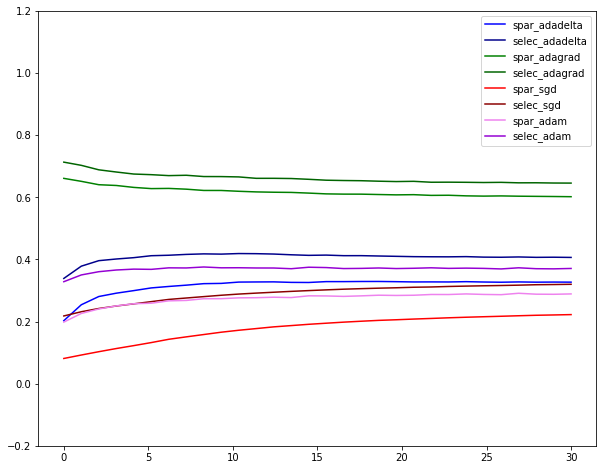

In [10]:
sparsity_adadelta = sparsity_val_extractor("sparsity_selectivity_4_optim_Adadelta.txt")
sparsity_adagrad = sparsity_val_extractor("sparsity_selectivity_4_optim_Adagrad.txt")
sparsity_sgd = sparsity_val_extractor("sparsity_selectivity_4_optim_SGD.txt")
sparsity_adam = sparsity_val_extractor("sparsity_selectivity_4_optim_Adam.txt")

selectivity_avg_adadelta, selectivity_std_adadelta = selectivity_val_extractor("sparsity_selectivity_4_optim_Adadelta.txt")
selectivity_avg_adagrad, selectivity_std_adagrad = selectivity_val_extractor("sparsity_selectivity_4_optim_Adagrad.txt")
selectivity_avg_sgd, selectivity_std_sgd = selectivity_val_extractor("sparsity_selectivity_4_optim_SGD.txt")
selectivity_avg_adam, selectivity_std_adam = selectivity_val_extractor("sparsity_selectivity_4_optim_Adam.txt")

all_plotter_spar_selec(sparsity_adadelta, selectivity_avg_adadelta, sparsity_adagrad, selectivity_avg_adagrad, sparsity_sgd, selectivity_avg_sgd, sparsity_adam, selectivity_avg_adam)

# Subplots 

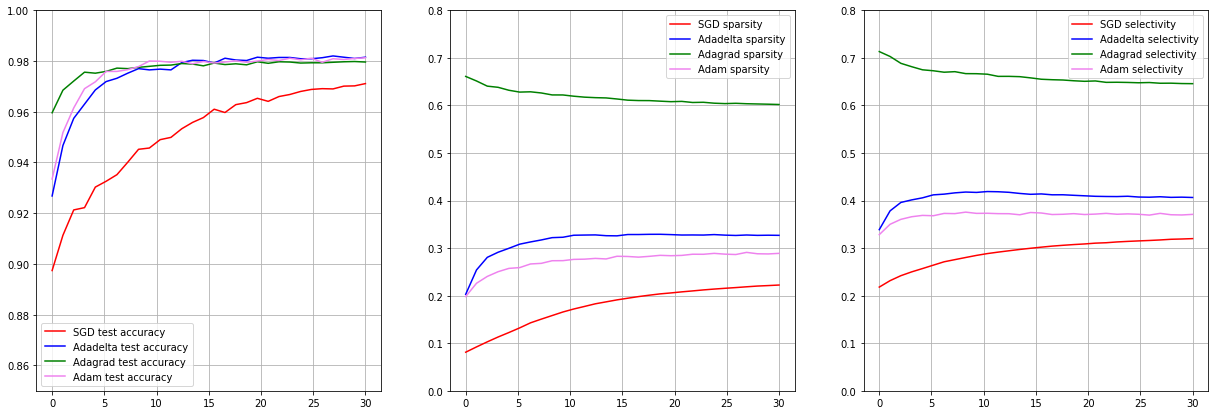

In [11]:
subplots(test_acc_sgd, test_acc_adadelta, test_acc_adagrad, test_acc_adam, sparsity_sgd, sparsity_adadelta, sparsity_adagrad, sparsity_adam, selectivity_avg_sgd, selectivity_avg_adadelta, selectivity_avg_adagrad, selectivity_avg_adam)